In [ ]:
 # Import the drive module from google.colab
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [ ]:
# File paths
europe_path = '/content/drive/My Drive/Conflict_data/ACLED/europe_conflict_data.csv'
asia_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
middle_east_path = '/content/drive/My Drive/Conflict_data/ACLED/middle_east_conflict_data.csv'

<ipython-input-4-6290d5295604>:11: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  asia_df = pd.read_csv(asia_path)


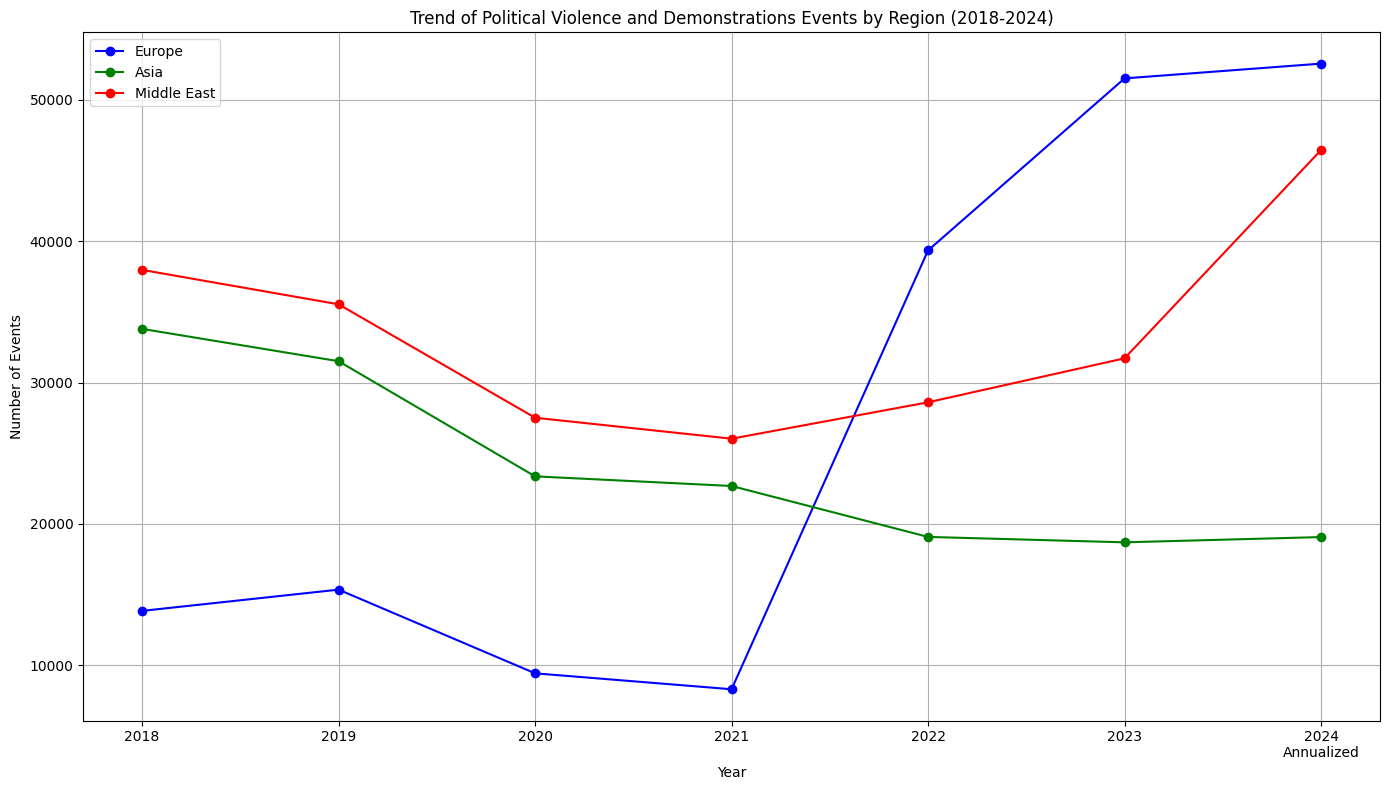

In [ ]:
# Load the datasets
europe_df = pd.read_csv(europe_path)
asia_df = pd.read_csv(asia_path)
middle_east_df = pd.read_csv(middle_east_path)

# Function to filter political violence data, group by year, and ensure year range
def filter_and_group_by_year(df):
    political_violence_data = df[df['disorder_type'].isin(['Political violence', 'Political violence; Demonstrations'])]
    violence_by_year = political_violence_data.groupby('year').size()
    # Ensure all years from 2018 to 2024 are included
    all_years = pd.Series(index=range(2018, 2025), data=0)
    violence_by_year = violence_by_year.reindex(all_years.index, fill_value=0)
    # Annualize 2024 data
    if 2024 in violence_by_year.index:
        violence_by_year.loc[2024] = (violence_by_year.loc[2024] / 6) * 12
    return violence_by_year

# Filter and group data for each region
europe_violence_by_year = filter_and_group_by_year(europe_df)
asia_violence_by_year = filter_and_group_by_year(asia_df)
middle_east_violence_by_year = filter_and_group_by_year(middle_east_df)

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(europe_violence_by_year.index, europe_violence_by_year, marker='o', label='Europe', color='blue')
plt.plot(asia_violence_by_year.index, asia_violence_by_year, marker='o', label='Asia', color='green')
plt.plot(middle_east_violence_by_year.index, middle_east_violence_by_year, marker='o', label='Middle East', color='red')

# Modify the x-axis tick labels
xticks_labels = europe_violence_by_year.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=europe_violence_by_year.index, labels=xticks_labels)

plt.title('Trend of Political Violence and Demonstrations Events by Region (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process the dataset and plot top 5 countries with the highest political violence events
def process_political_violence_data(file_path, region_name):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Filter the dataset for Political Violence
    political_violence_data = df[df['disorder_type'].isin(['Political violence', 'Political violence; Demonstrations'])]

    # Group by country and year to get the count of events
    political_violence_by_country = political_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

    # Annualize 2024 data
    if 2024 in political_violence_by_country.index:
        political_violence_by_country.loc[2024] = (political_violence_by_country.loc[2024] / 6) * 12

    # Sum the political violence counts across all years
    total_political_violence_by_country = political_violence_by_country.sum(axis=0)

    # Sort the total counts in descending order to get the countries with the highest political violence events
    highest_political_violence_events = total_political_violence_by_country.sort_values(ascending=False).head(5)
    print(f"Top 5 countries with the highest political violence events in {region_name} (combined for all years including 2024 annualized):")
    print(highest_political_violence_events)

# Process each dataset
process_political_violence_data(europe_path, 'Europe')
process_political_violence_data(asia_path, 'Asia')
process_political_violence_data(middle_east_path, 'Middle East')

Top 5 countries with the highest political violence events in Europe (combined for all years including 2024 annualized):
country
Ukraine    172186
Russia      14057
Greece        862
France        538
Italy         354
dtype: int64


<ipython-input-7-13fb83cd7f08>:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Top 5 countries with the highest political violence events in Asia (combined for all years including 2024 annualized):
country
Afghanistan    62718
Myanmar        43042
India          30297
Pakistan       20514
Azerbaijan     18087
dtype: int64
Top 5 countries with the highest political violence events in Middle East (combined for all years including 2024 annualized):
country
Syria        118203
Yemen         74834
Palestine     45190
Iraq          45030
Lebanon       11927
dtype: int64


#### Percent Change from 2018 to 2024 Annualized

---



In [ ]:
import pandas as pd

# Load the datasets with low_memory=False to handle mixed types
europe_path = '/content/drive/My Drive/Conflict_data/ACLED/europe_conflict_data.csv'
asia_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
middle_east_path = '/content/drive/My Drive/Conflict_data/ACLED/middle_east_conflict_data.csv'

europe_df = pd.read_csv(europe_path, low_memory=False)
asia_df = pd.read_csv(asia_path, low_memory=False)
middle_east_df = pd.read_csv(middle_east_path, low_memory=False)

# Add region column to each dataset
europe_df['region'] = 'Europe'
asia_df['region'] = 'Asia'
middle_east_df['region'] = 'Middle East'

# Combine the datasets
combined_df = pd.concat([europe_df, asia_df, middle_east_df], ignore_index=True)

# Filter the dataset for Political Violence
political_violence_data = combined_df[combined_df['disorder_type'].isin(['Political violence', 'Political violence; Demonstrations'])]

# Group by year and region to get the count of events
violence_by_year_region = political_violence_data.groupby(['year', 'region']).size().unstack(fill_value=0)

# Function to calculate annualized data for 2024
def annualize_2024(data):
    if 2024 in data.index:
        return (data.loc[2024] / 6) * 12
    else:
        return pd.Series([0] * data.shape[1], index=data.columns)

# Calculate totals for 2018 and annualized 2024
total_2018 = violence_by_year_region.loc[2018] if 2018 in violence_by_year_region.index else pd.Series([0] * violence_by_year_region.shape[1], index=violence_by_year_region.columns)
total_2024_annualized = annualize_2024(violence_by_year_region)

# Calculate the percentage change for each region
percentage_change = ((total_2024_annualized - total_2018) / total_2018.replace(0, 1)) * 100  # Avoid division by zero

# Print the results
print("Percentage Change from 2018 to 2024 (Annualized) for Political Violence and Demonstrations:")
print(percentage_change)

Percentage Change from 2018 to 2024 (Annualized) for Political Violence and Demonstrations:
region
Asia           -43.571386
Europe         279.470151
Middle East     22.327847
dtype: float64


In [ ]:
# File paths
europe_path = '/content/drive/My Drive/Conflict_data/ACLED/europe_conflict_data.csv'
asia_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
middle_east_path = '/content/drive/My Drive/Conflict_data/ACLED/middle_east_conflict_data.csv'

# Load the datasets
europe_df = pd.read_csv(europe_path)
asia_df = pd.read_csv(asia_path)
middle_east_df = pd.read_csv(middle_east_path)

<ipython-input-10-1943b2516901>:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  asia_df = pd.read_csv(asia_path)


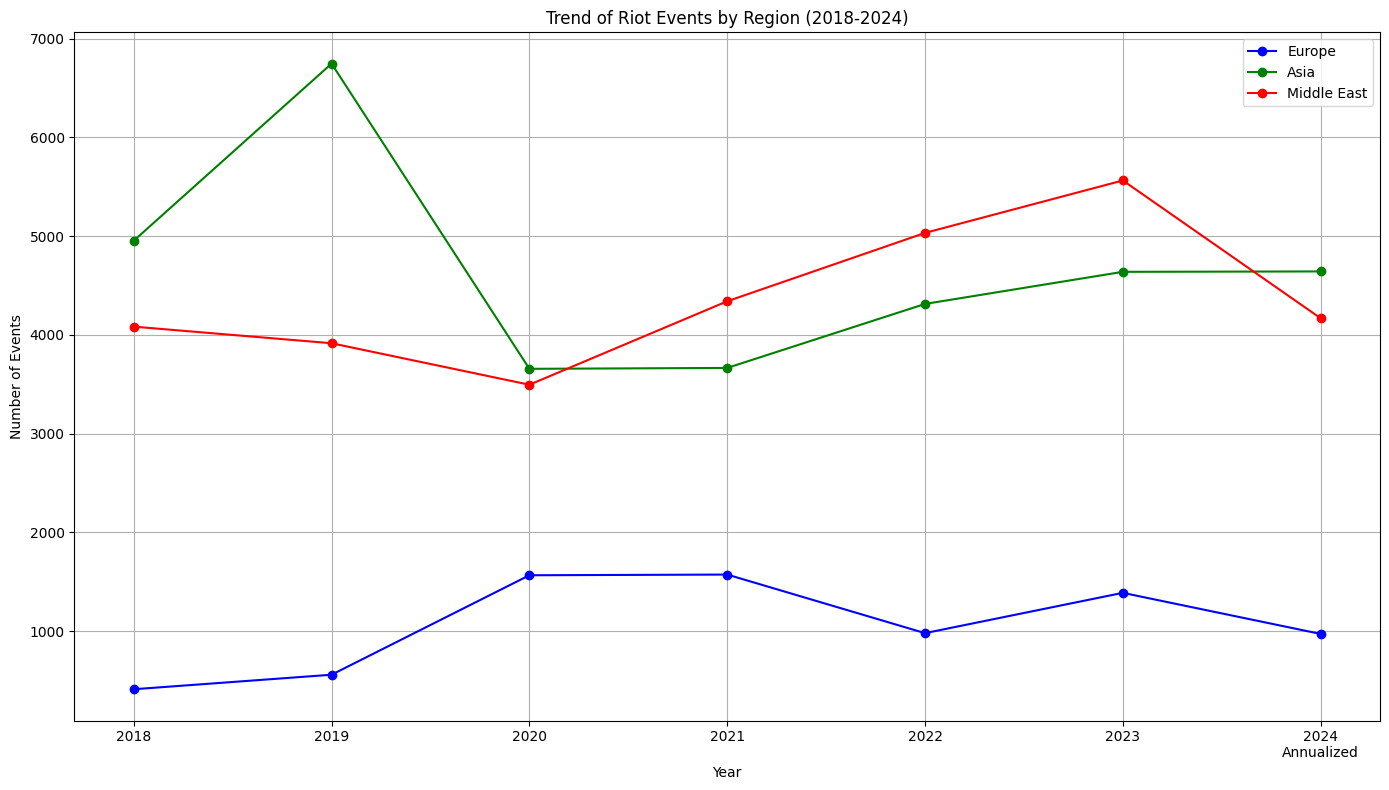

In [ ]:
# Function to filter riot violence data, group by year, and ensure year range
def filter_and_group_by_year(df):
    riot_violence_data = df[df['event_type'].isin(['Riots'])]
    violence_by_year = riot_violence_data.groupby('year').size()
    # Ensure all years from 2018 to 2024 are included
    all_years = pd.Series(index=range(2018, 2025), data=0)
    violence_by_year = violence_by_year.reindex(all_years.index, fill_value=0)
    # Annualize 2024 data
    if 2024 in violence_by_year.index:
        violence_by_year.loc[2024] = (violence_by_year.loc[2024] / 6) * 12
    return violence_by_year

# Filter and group data for each region
europe_riot_by_year = filter_and_group_by_year(europe_df)
asia_riot_by_year = filter_and_group_by_year(asia_df)
middle_east_riot_by_year = filter_and_group_by_year(middle_east_df)

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(europe_riot_by_year.index, europe_riot_by_year, marker='o', label='Europe', color='blue')
plt.plot(asia_riot_by_year.index, asia_riot_by_year, marker='o', label='Asia', color='green')
plt.plot(middle_east_riot_by_year.index, middle_east_riot_by_year, marker='o', label='Middle East', color='red')

# Modify the x-axis tick labels
xticks_labels = europe_riot_by_year.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=europe_riot_by_year.index, labels=xticks_labels)

plt.title('Trend of Riot Events by Region (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process the dataset and plot top 5 countries with the highest riot events
def process_riot_violence_data(file_path, region_name):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Filter the dataset for Riot events
    riot_violence_data = df[df['event_type'].isin(['Riots'])]

    # Group by country and year to get the count of events
    riot_violence_by_country = riot_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

    # Annualize 2024 data
    if 2024 in riot_violence_by_country.index:
        riot_violence_by_country.loc[2024] = (riot_violence_by_country.loc[2024] / 6) * 12

    # Sum the riot counts across all years
    total_riot_violence_by_country = riot_violence_by_country.sum(axis=0)

    # Sort the total counts in descending order to get the countries with the highest riot events
    highest_riot_violence_events = total_riot_violence_by_country.sort_values(ascending=False).head(5)
    print(f"Top 5 countries with the highest riot events in {region_name} (combined for all years including 2024 annualized):")
    print(highest_riot_violence_events)

# Process each dataset
process_riot_violence_data(europe_path, 'Europe')
process_riot_violence_data(asia_path, 'Asia')
process_riot_violence_data(middle_east_path, 'Middle East')

Top 5 countries with the highest riot events in Europe (combined for all years including 2024 annualized):
country
France     1880
Greece     1118
Germany     760
Italy       673
Spain       568
dtype: int64


<ipython-input-9-22ef6c3588d4>:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Top 5 countries with the highest riot events in Asia (combined for all years including 2024 annualized):
country
India         22482
Bangladesh    11248
Nepal          4609
Pakistan       4422
Indonesia      1440
dtype: int64
Top 5 countries with the highest riot events in Middle East (combined for all years including 2024 annualized):
country
Palestine    22443
Bahrain       3950
Lebanon       2660
Iraq          1338
Iran          1261
dtype: int64


Percent Change from 2018 to 2024 Annualized for Riots

---

In [ ]:
import pandas as pd

# Load the datasets with low_memory=False to handle mixed types
europe_path = '/content/drive/My Drive/Conflict_data/ACLED/europe_conflict_data.csv'
asia_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
middle_east_path = '/content/drive/My Drive/Conflict_data/ACLED/middle_east_conflict_data.csv'

europe_df = pd.read_csv(europe_path, low_memory=False)
asia_df = pd.read_csv(asia_path, low_memory=False)
middle_east_df = pd.read_csv(middle_east_path, low_memory=False)

# Add region column to each dataset
europe_df['region'] = 'Europe'
asia_df['region'] = 'Asia'
middle_east_df['region'] = 'Middle East'

# Combine the datasets
combined_df = pd.concat([europe_df, asia_df, middle_east_df], ignore_index=True)

# Filter the dataset for Riot Events
riot_violence_data = combined_df[combined_df['event_type'].isin(['Riots'])]

# Group by year and region to get the count of events
riot_by_year_region = riot_violence_data.groupby(['year', 'region']).size().unstack(fill_value=0)

# Function to calculate annualized data for 2024
def annualize_2024(data):
    if 2024 in data.index:
        return (data.loc[2024] / 6) * 12
    else:
        return pd.Series([0] * data.shape[1], index=data.columns)

# Calculate totals for 2018 and annualized 2024
total_2018 = riot_by_year_region.loc[2018] if 2018 in riot_by_year_region.index else pd.Series([0] * riot_by_year_region.shape[1], index=riot_by_year_region.columns)
total_2024_annualized = annualize_2024(riot_by_year_region)

# Calculate the percentage change for each region
percentage_change = ((total_2024_annualized - total_2018) / total_2018.replace(0, 1)) * 100  # Avoid division by zero

# Print the results
print("Percentage Change from 2018 to 2024 (Annualized) for Riot Events:")
print(percentage_change)

Percentage Change from 2018 to 2024 (Annualized) for Riot Events:
region
Asia            -6.279023
Europe         135.922330
Middle East      2.081803
dtype: float64


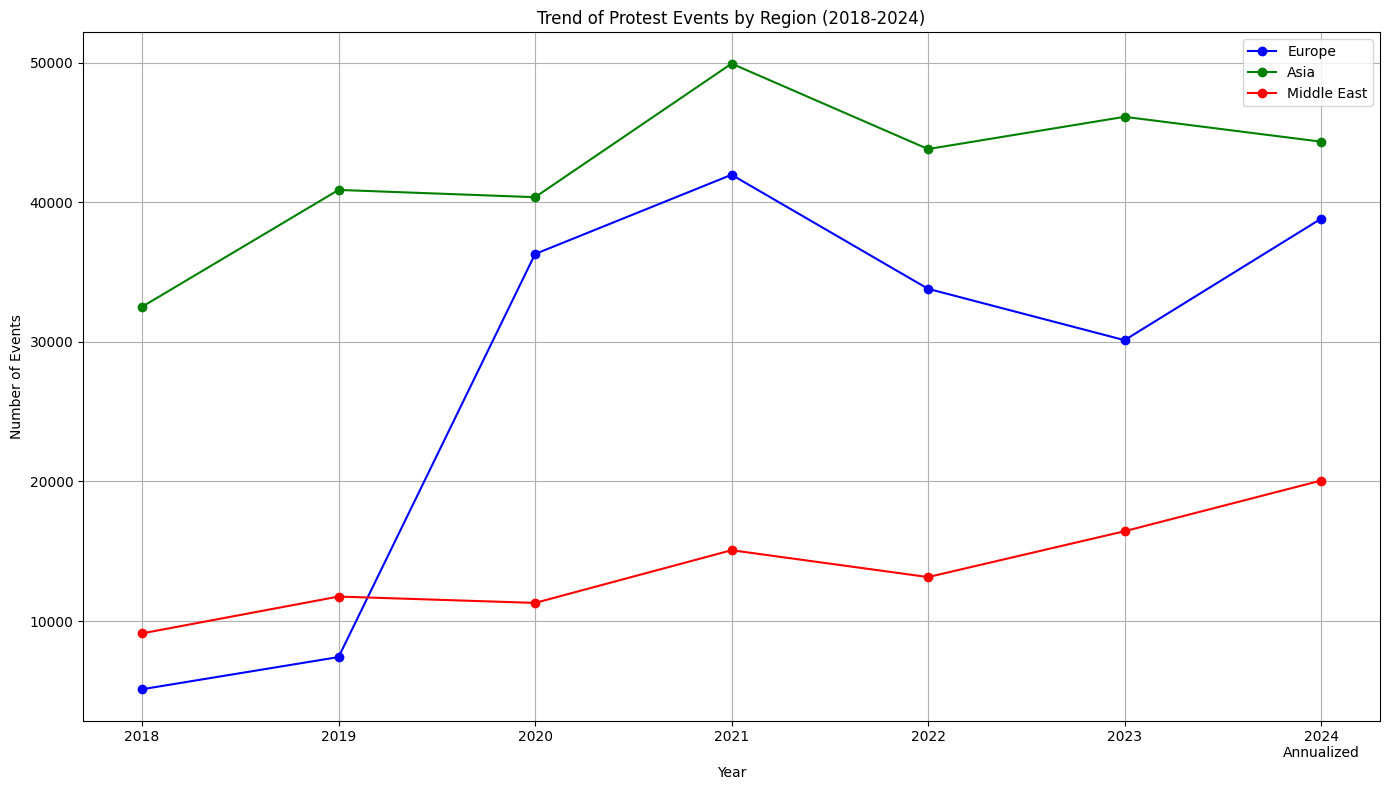

In [ ]:
# Function to filter protest violence data, group by year, and ensure year range
def filter_and_group_by_year(df):
    protest_violence_data = df[df['event_type'].isin(['Protests'])]
    violence_by_year = protest_violence_data.groupby('year').size()
    # Ensure all years from 2018 to 2024 are included
    all_years = pd.Series(index=range(2018, 2025), data=0)
    violence_by_year = violence_by_year.reindex(all_years.index, fill_value=0)
    # Annualize 2024 data
    if 2024 in violence_by_year.index:
        violence_by_year.loc[2024] = (violence_by_year.loc[2024] / 6) * 12
    return violence_by_year

# Filter and group data for each region
europe_protest_by_year = filter_and_group_by_year(europe_df)
asia_protest_by_year = filter_and_group_by_year(asia_df)
middle_east_protest_by_year = filter_and_group_by_year(middle_east_df)

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(europe_protest_by_year.index, europe_protest_by_year, marker='o', label='Europe', color='blue')
plt.plot(asia_protest_by_year.index, asia_protest_by_year, marker='o', label='Asia', color='green')
plt.plot(middle_east_protest_by_year.index, middle_east_protest_by_year, marker='o', label='Middle East', color='red')

# Modify the x-axis tick labels
xticks_labels = europe_protest_by_year.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=europe_protest_by_year.index, labels=xticks_labels)

plt.title('Trend of Protest Events by Region (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process the dataset and plot top 5 countries with the highest protest events
def process_protest_violence_data(file_path, region_name):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Filter the dataset for Protest Violence
    protest_violence_data = df[df['event_type'].isin(['Protests'])]

    # Group by country and year to get the count of events
    protest_violence_by_country = protest_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

    # Annualize 2024 data
    if 2024 in protest_violence_by_country.index:
        protest_violence_by_country.loc[2024] = (protest_violence_by_country.loc[2024] / 6) * 12

    # Sum the protest counts across all years
    total_protest_violence_by_country = protest_violence_by_country.sum(axis=0)

    # Sort the total counts in descending order to get the countries with the highest Protest events
    highest_protest_events = total_protest_violence_by_country.sort_values(ascending=False).head(5)
    print(f"Top 5 countries with the highest Protest events in {region_name} (combined for all years including 2024 annualized):")
    print(highest_protest_events)

# File paths for the different datasets
europe_path = '/content/drive/My Drive/Conflict_data/ACLED/europe_conflict_data.csv'
asia_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
middle_east_path = '/content/drive/My Drive/Conflict_data/ACLED/middle_east_conflict_data.csv'

# Process each dataset
process_protest_violence_data(europe_path, 'Europe')
process_protest_violence_data(asia_path, 'Asia')
process_protest_violence_data(middle_east_path, 'Middle East')

Top 5 countries with the highest Protest events in Europe (combined for all years including 2024 annualized):
country
France     36745
Germany    24006
Italy      23590
Spain      19391
Poland      8329
dtype: int64


<ipython-input-5-4f13e9a2de41>:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Top 5 countries with the highest Protest events in Asia (combined for all years including 2024 annualized):
country
India          130326
Pakistan        73075
South Korea     38110
Nepal           16641
Indonesia       15180
dtype: int64
Top 5 countries with the highest Protest events in Middle East (combined for all years including 2024 annualized):
country
Iran       25665
Turkey     25515
Yemen      11170
Lebanon    10449
Bahrain     8923
dtype: int64


Percent Change from 2018 to 2024 Annualized for Protests

---

In [ ]:
europe_df = pd.read_csv(europe_path, low_memory=False)
asia_df = pd.read_csv(asia_path, low_memory=False)
middle_east_df = pd.read_csv(middle_east_path, low_memory=False)

# Add region column to each dataset
europe_df['region'] = 'Europe'
asia_df['region'] = 'Asia'
middle_east_df['region'] = 'Middle East'

# Combine the datasets
combined_df = pd.concat([europe_df, asia_df, middle_east_df], ignore_index=True)

# Filter the dataset for Protest Events
protest_violence_data = combined_df[combined_df['event_type'].isin(['Protests'])]

# Group by year and region to get the count of events
protest_by_year_region = protest_violence_data.groupby(['year', 'region']).size().unstack(fill_value=0)

# Function to calculate annualized data for 2024
def annualize_2024(data):
    if 2024 in data.index:
        return (data.loc[2024] / 6) * 12
    else:
        return pd.Series([0] * data.shape[1], index=data.columns)

# Calculate totals for 2018 and annualized 2024
total_2018 = protest_by_year_region.loc[2018] if 2018 in protest_by_year_region.index else pd.Series([0] * protest_by_year_region.shape[1], index=protest_by_year_region.columns)
total_2024_annualized = annualize_2024(protest_by_year_region)

# Calculate the percentage change for each region
percentage_change = ((total_2024_annualized - total_2018) / total_2018.replace(0, 1)) * 100  # Avoid division by zero

# Print the results
print("Percentage Change from 2018 to 2024 (Annualized) for Protest Events:")
print(percentage_change)

Percentage Change from 2018 to 2024 (Annualized) for Protest Events:
region
Asia            36.365593
Europe         658.835027
Middle East    120.046058
dtype: float64


<ipython-input-6-83fbae5f62ce>:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  asia_df = pd.read_csv(asia_path)


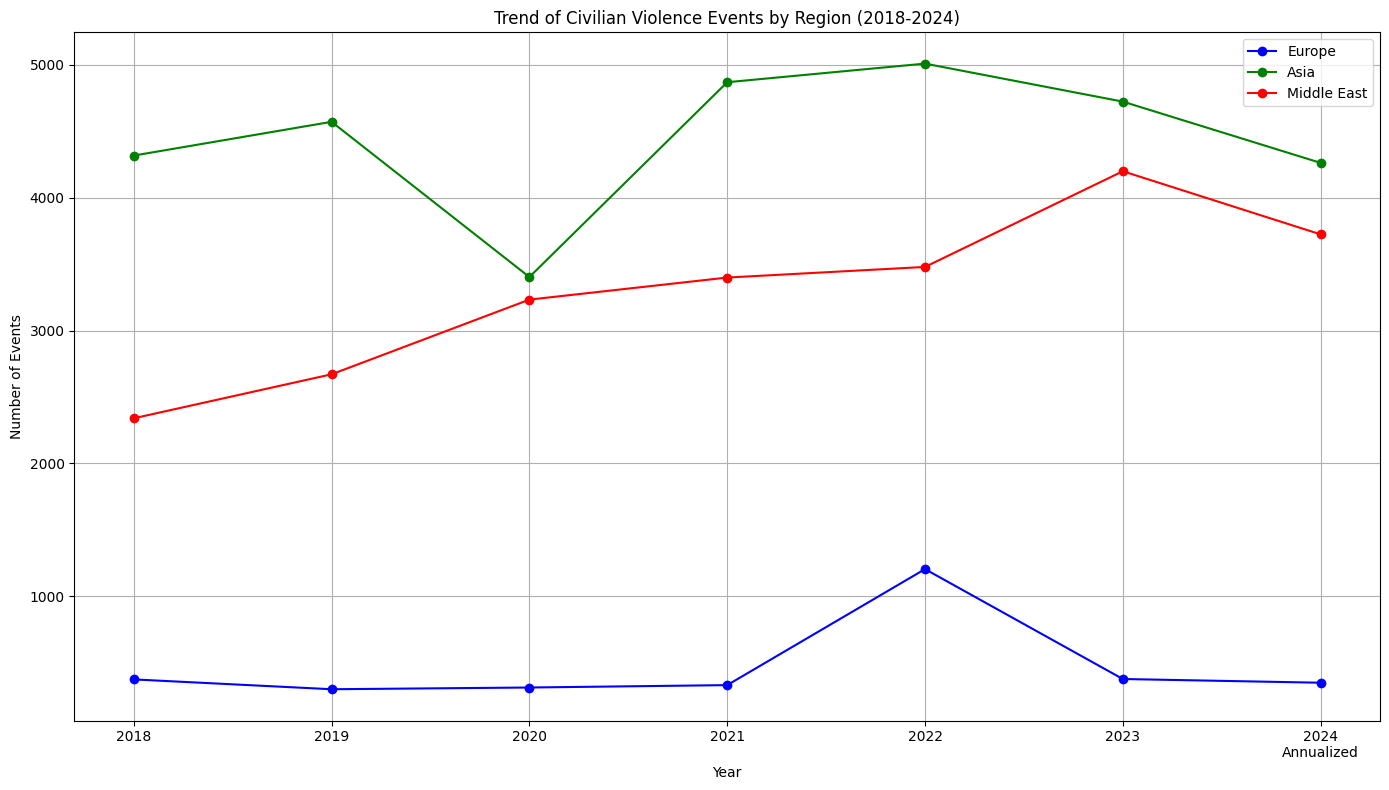

In [ ]:
# Function to filter civilian violence data, group by year, and ensure year range
def filter_and_group_by_year(df):
    civilian_violence_data = df[df['event_type'].isin(['Violence against civilians'])]
    violence_by_year = civilian_violence_data.groupby('year').size()
    # Ensure all years from 2018 to 2024 are included
    all_years = pd.Series(index=range(2018, 2025), data=0)
    violence_by_year = violence_by_year.reindex(all_years.index, fill_value=0)
    # Annualize 2024 data
    if 2024 in violence_by_year.index:
        violence_by_year.loc[2024] = (violence_by_year.loc[2024] / 6) * 12
    return violence_by_year

# Filter and group data for each region
europe_violence_by_year = filter_and_group_by_year(europe_df)
asia_violence_by_year = filter_and_group_by_year(asia_df)
middle_east_violence_by_year = filter_and_group_by_year(middle_east_df)

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(europe_violence_by_year.index, europe_violence_by_year, marker='o', label='Europe', color='blue')
plt.plot(asia_violence_by_year.index, asia_violence_by_year, marker='o', label='Asia', color='green')
plt.plot(middle_east_violence_by_year.index, middle_east_violence_by_year, marker='o', label='Middle East', color='red')

# Modify the x-axis tick labels
xticks_labels = europe_violence_by_year.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=europe_violence_by_year.index, labels=xticks_labels)

plt.title('Trend of Civilian Violence Events by Region (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process the dataset and plot top 5 countries with the highest civilian violence events
def process_civilian_violence_data(file_path, region_name):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Filter the dataset for Civilian Violence
    civilian_violence_data = df[df['event_type'].isin(['Violence against civilians'])]

    # Group by country and year to get the count of events
    civilian_violence_by_country = civilian_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

    # Annualize 2024 data
    if 2024 in civilian_violence_by_country.index:
        civilian_violence_by_country.loc[2024] = (civilian_violence_by_country.loc[2024] / 6) * 12

    # Sum the civilian violence counts across all years
    total_civilian_violence_by_country = civilian_violence_by_country.sum(axis=0)

    # Sort the total counts in descending order to get the countries with the highest civilian violence events
    highest_civilian_violence_events = total_civilian_violence_by_country.sort_values(ascending=False).head(5)
    print(f"Top 5 countries with the highest civilian violence events in {region_name} (combined for all years including 2024 annualized):")
    print(highest_civilian_violence_events)

# Process each dataset
process_civilian_violence_data(europe_path, 'Europe')
process_civilian_violence_data(asia_path, 'Asia')
process_civilian_violence_data(middle_east_path, 'Middle East')

Top 5 countries with the highest civilian violence events in Europe (combined for all years including 2024 annualized):
country
Ukraine    1385
Russia      797
Greece      198
Belarus     156
France       92
dtype: int64


<ipython-input-6-e1eb07fcd53d>:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Top 5 countries with the highest civilian violence events in Asia (combined for all years including 2024 annualized):
country
Philippines    9151
Myanmar        8277
India          6826
Pakistan       4920
Afghanistan    4337
dtype: int64
Top 5 countries with the highest civilian violence events in Middle East (combined for all years including 2024 annualized):
country
Syria        12631
Yemen         4447
Palestine     3832
Iraq          3415
Turkey         908
dtype: int64


Percent Change from 2018 to 2024 Annualized for Violence Against Civilians

---

In [ ]:
europe_df = pd.read_csv(europe_path, low_memory=False)
asia_df = pd.read_csv(asia_path, low_memory=False)
middle_east_df = pd.read_csv(middle_east_path, low_memory=False)

# Add region column to each dataset
europe_df['region'] = 'Europe'
asia_df['region'] = 'Asia'
middle_east_df['region'] = 'Middle East'

# Combine the datasets
combined_df = pd.concat([europe_df, asia_df, middle_east_df], ignore_index=True)

# Filter the dataset for Violence against Civilians
civilian_violence_data = combined_df[combined_df['event_type'].isin(['Violence against civilians'])]

# Group by year and region to get the count of events
civilian_violence_by_year_region = civilian_violence_data.groupby(['year', 'region']).size().unstack(fill_value=0)

# Function to calculate annualized data for 2024
def annualize_2024(data):
    if 2024 in data.index:
        return (data.loc[2024] / 6) * 12
    else:
        return pd.Series([0] * data.shape[1], index=data.columns)

# Calculate totals for 2018 and annualized 2024
total_2018 = civilian_violence_by_year_region.loc[2018] if 2018 in civilian_violence_by_year_region.index else pd.Series([0] * civilian_violence_by_year_region.shape[1], index=civilian_violence_by_year_region.columns)
total_2024_annualized = annualize_2024(civilian_violence_by_year_region)

# Calculate the percentage change for each region
percentage_change = ((total_2024_annualized - total_2018) / total_2018.replace(0, 1)) * 100  # Avoid division by zero

# Print the results
print("Percentage Change from 2018 to 2024 (Annualized) for Violence against Civilians:")
print(percentage_change)

Percentage Change from 2018 to 2024 (Annualized) for Violence against Civilians:
region
Asia           -1.274033
Europe         -6.666667
Middle East    59.145299
dtype: float64


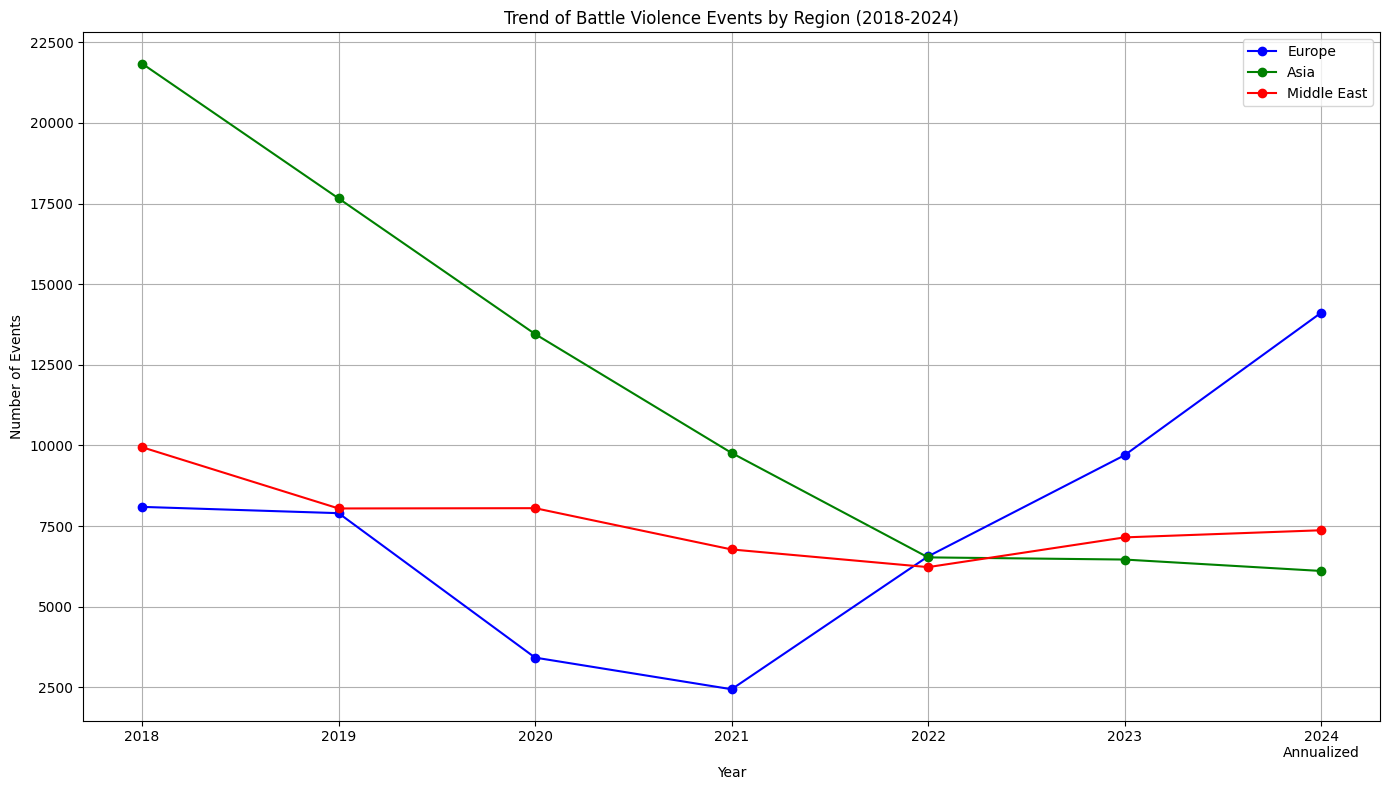

In [ ]:

# Function to filter battle violence data, group by year, and ensure year range
def filter_and_group_by_year(df):
    battle_violence_data = df[df['event_type'].isin(['Battles'])]
    violence_by_year = battle_violence_data.groupby('year').size()
    # Ensure all years from 2018 to 2024 are included
    all_years = pd.Series(index=range(2018, 2025), data=0)
    violence_by_year = violence_by_year.reindex(all_years.index, fill_value=0)
    # Annualize 2024 data
    if 2024 in violence_by_year.index:
        violence_by_year.loc[2024] = (violence_by_year.loc[2024] / 6) * 12
    return violence_by_year

# Filter and group data for each region
europe_violence_by_year = filter_and_group_by_year(europe_df)
asia_violence_by_year = filter_and_group_by_year(asia_df)
middle_east_violence_by_year = filter_and_group_by_year(middle_east_df)

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(europe_violence_by_year.index, europe_violence_by_year, marker='o', label='Europe', color='blue')
plt.plot(asia_violence_by_year.index, asia_violence_by_year, marker='o', label='Asia', color='green')
plt.plot(middle_east_violence_by_year.index, middle_east_violence_by_year, marker='o', label='Middle East', color='red')

# Modify the x-axis tick labels
xticks_labels = europe_violence_by_year.index.tolist()
xticks_labels = [str(label) for label in xticks_labels]
if '2024' in xticks_labels:
    xticks_labels[xticks_labels.index('2024')] = '2024\nAnnualized'

plt.xticks(ticks=europe_violence_by_year.index, labels=xticks_labels)

plt.title('Trend of Battle Violence Events by Region (2018-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process the dataset and plot top 5 countries with the highest battle events
def process_battle_violence_data(file_path, region_name):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Filter the dataset for Battle events
    battle_violence_data = df[df['event_type'].isin(['Battles'])]

    # Group by country and year to get the count of events
    battle_violence_by_country = battle_violence_data.groupby(['year', 'country']).size().unstack(fill_value=0)

    # Annualize 2024 data
    if 2024 in battle_violence_by_country.index:
        battle_violence_by_country.loc[2024] = (battle_violence_by_country.loc[2024] / 6) * 12

    # Sum the battle counts across all years
    total_battle_violence_by_country = battle_violence_by_country.sum(axis=0)

    # Sort the total counts in descending order to get the countries with the highest battle events
    highest_battle_violence_events = total_battle_violence_by_country.sort_values(ascending=False).head(5)
    print(f"Top 5 countries with the highest battle events in {region_name} (combined for all years including 2024 annualized):")
    print(highest_battle_violence_events)

# Process each dataset
process_battle_violence_data(europe_path, 'Europe')
process_battle_violence_data(asia_path, 'Asia')
process_battle_violence_data(middle_east_path, 'Middle East')

Top 5 countries with the highest battle events in Europe (combined for all years including 2024 annualized):
country
Ukraine    51957
Russia       196
Greece        12
France         7
Kosovo         7
dtype: int64


<ipython-input-12-7eb28b1dc9db>:8: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Top 5 countries with the highest battle events in Asia (combined for all years including 2024 annualized):
country
Afghanistan    40848
Myanmar        18560
Azerbaijan     17327
Pakistan        6997
India           6469
dtype: int64
Top 5 countries with the highest battle events in Middle East (combined for all years including 2024 annualized):
country
Syria        27851
Yemen        23042
Iraq         12502
Palestine     5578
Turkey        3686
dtype: int64


Top 5 Middle Eastern countries with the highest battle events for 2024 (Annualized):

1.   Palestine - 2,628
2.   Syria - 2,614
3.   Iraq - 796
4.   Israel - 566
5.   Yemen - 518

Top 5 Asian countries with the highest battle events for 2024 (Annualized):

1.   Myanmar - 3,928
2.   Pakistan - 770
3.   India - 510
4.   Afghanistan - 318
5.   Philippines - 258

Top 5 European countries with the highest battle events for 2024 (Annualized):

1.   Ukraine - 14076
2.   Russia - 32
3.   France - 2
4.   Greece - 2
5.   Albania - 0

Percent Change from 2018 to 2024 Annualized for Battle Events

---

In [ ]:
europe_df = pd.read_csv(europe_path, low_memory=False)
asia_df = pd.read_csv(asia_path, low_memory=False)
middle_east_df = pd.read_csv(middle_east_path, low_memory=False)

# Add region column to each dataset
europe_df['region'] = 'Europe'
asia_df['region'] = 'Asia'
middle_east_df['region'] = 'Middle East'

# Combine the datasets
combined_df = pd.concat([europe_df, asia_df, middle_east_df], ignore_index=True)

# Filter the dataset for Battle events
battle_violence_data = combined_df[combined_df['event_type'].isin(['Battles'])]

# Group by year and region to get the count of events
battle_violence_by_year_region = battle_violence_data.groupby(['year', 'region']).size().unstack(fill_value=0)

# Function to calculate annualized data for 2024
def annualize_2024(data):
    if 2024 in data.index:
        return (data.loc[2024] / 6) * 12
    else:
        return pd.Series([0] * data.shape[1], index=data.columns)

# Calculate totals for 2018 and annualized 2024
total_2018 = battle_violence_by_year_region.loc[2018] if 2018 in battle_violence_by_year_region.index else pd.Series([0] * battle_violence_by_year_region.shape[1], index=battle_violence_by_year_region.columns)
total_2024_annualized = annualize_2024(battle_violence_by_year_region)

# Calculate the percentage change for each region
percentage_change = ((total_2024_annualized - total_2018) / total_2018.replace(0, 1)) * 100  # Avoid division by zero

# Print the results
print("Percentage Change from 2018 to 2024 (Annualized) for Battle Events:")
print(percentage_change)

Percentage Change from 2018 to 2024 (Annualized) for Battle Events:
region
Asia          -72.040844
Europe         74.372915
Middle East   -25.897616
dtype: float64


##Heatmaps

<ipython-input-3-b17f116126ad>:12: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  asia_df = pd.read_csv(asia_path)


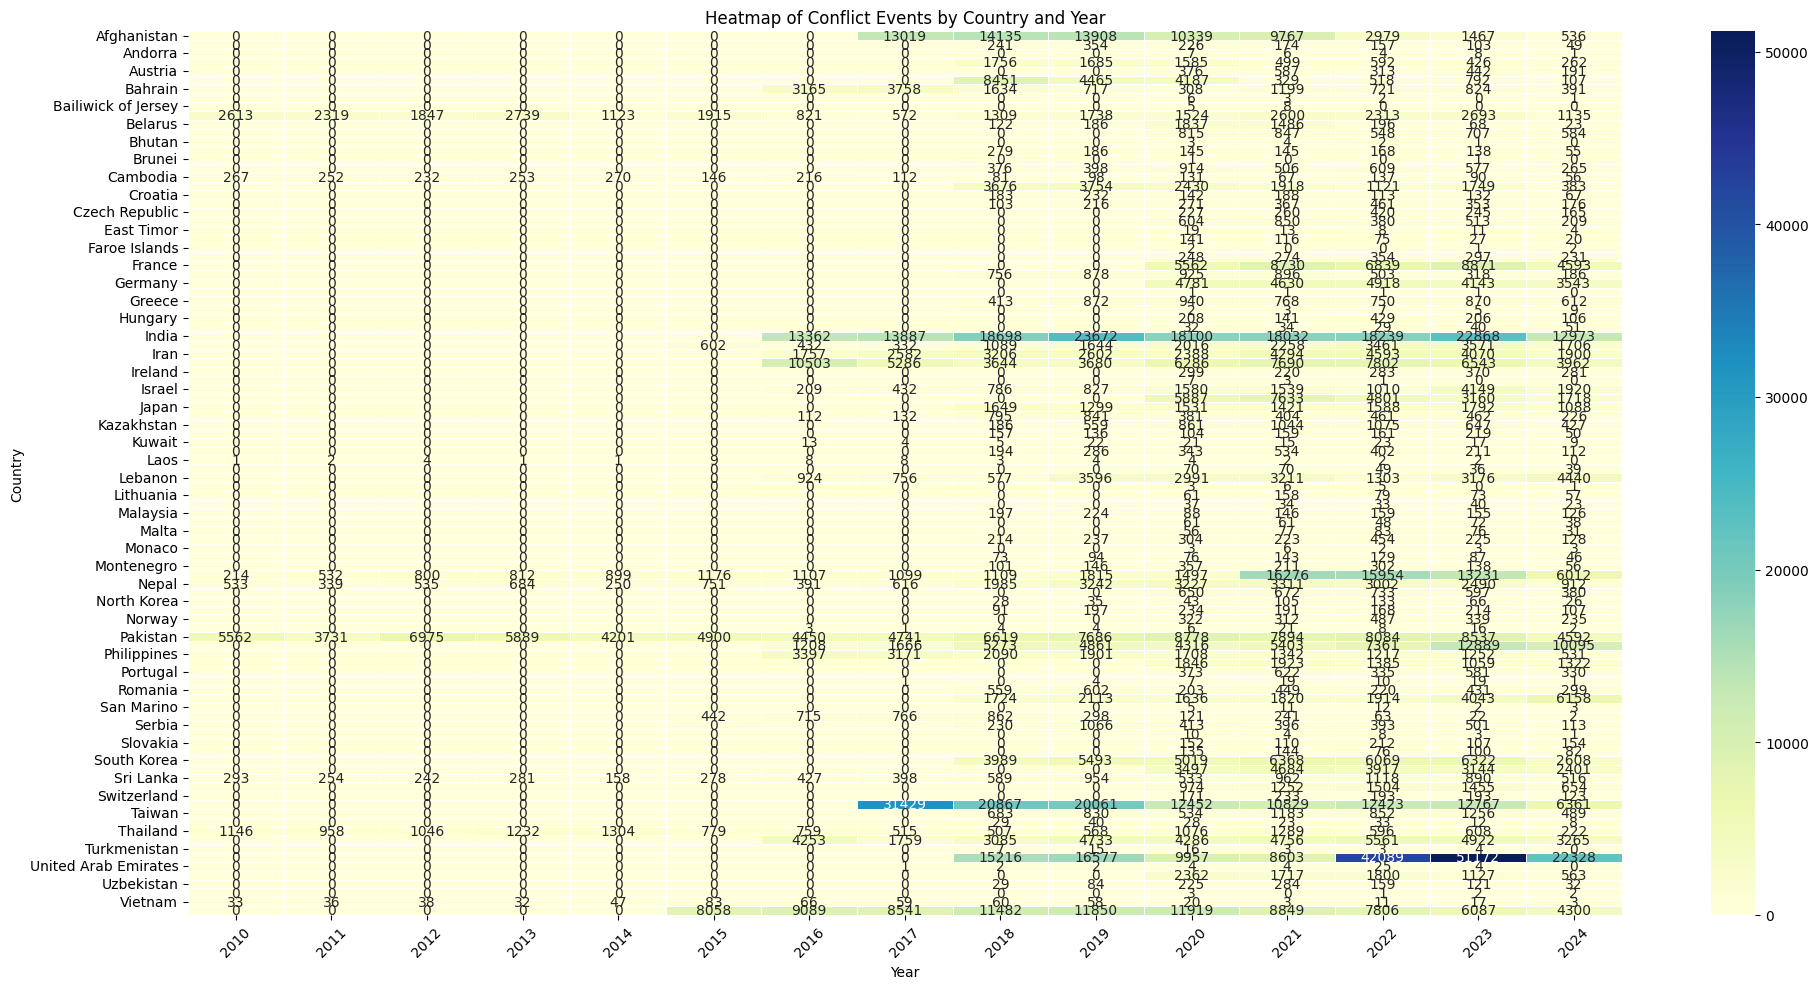

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File paths for the datasets
europe_path = '/content/drive/My Drive/Conflict_data/ACLED/europe_conflict_data.csv'
asia_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
middle_east_path = '/content/drive/My Drive/Conflict_data/ACLED/middle_east_conflict_data.csv'

# Load the datasets
europe_df = pd.read_csv(europe_path)
asia_df = pd.read_csv(asia_path)
middle_east_df = pd.read_csv(middle_east_path)

# Combine the datasets
combined_df = pd.concat([europe_df, asia_df, middle_east_df], ignore_index=True)

# Group by country and year to get the count of events
events_by_country_year = combined_df.groupby(['country', 'year']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(events_by_country_year, cmap="YlGnBu", linewidths=.5, annot=True, fmt="d")

plt.title('Heatmap of Conflict Events by Country and Year')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 99.9 MB/s eta 0:00:00


<ipython-input-6-4d9df60c4678>:14: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  asia_df = pd.read_csv(asia_path)
<ipython-input-6-4d9df60c4678>:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


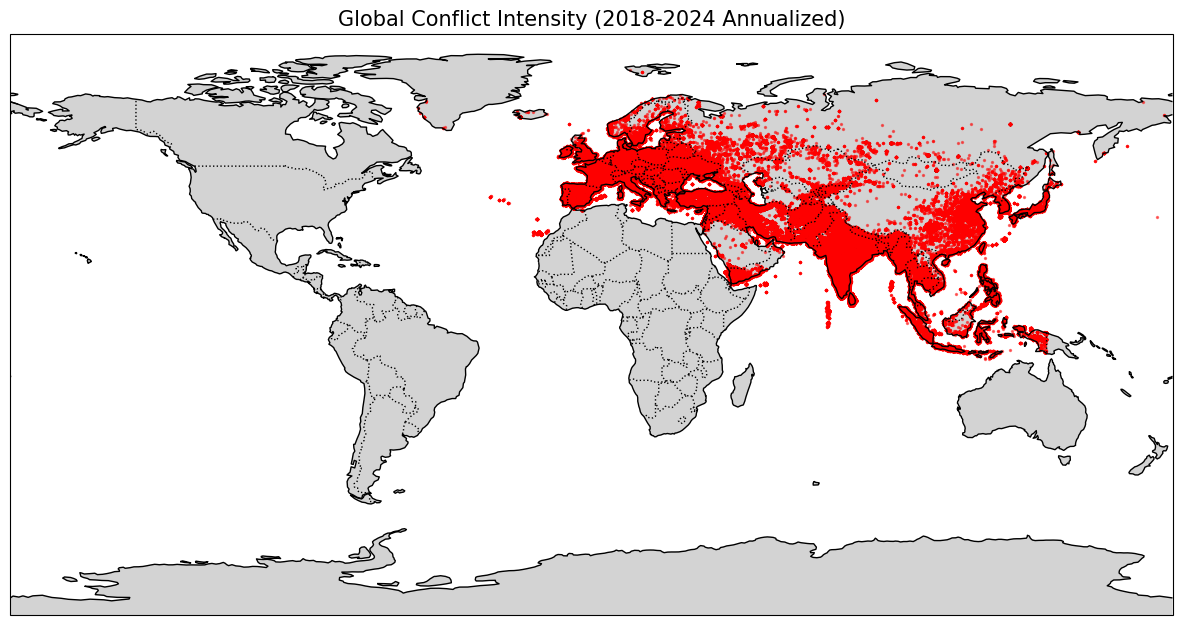

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
europe_path = '/content/drive/My Drive/Conflict_data/ACLED/europe_conflict_data.csv'
asia_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
middle_east_path = '/content/drive/My Drive/Conflict_data/ACLED/middle_east_conflict_data.csv'

europe_df = pd.read_csv(europe_path)
asia_df = pd.read_csv(asia_path)
middle_east_df = pd.read_csv(middle_east_path)

# Combine the datasets
combined_df = pd.concat([europe_df, asia_df, middle_east_df], ignore_index=True)

# Extract relevant data
events_df = combined_df[['latitude', 'longitude', 'event_type']].dropna()

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with conflict data
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Plot the world map with Cartopy features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Plot the events
events_gdf = gpd.GeoDataFrame(events_df, geometry=[Point(xy) for xy in zip(events_df['longitude'], events_df['latitude'])])
world.plot(ax=ax, color='lightgrey')
events_gdf.plot(ax=ax, markersize=2, color='red', alpha=0.5)

# Set titles and labels
plt.title('Global Conflict Intensity (2018-2024 Annualized)', fontsize=15)

# Display the plot
plt.show()

<ipython-input-7-a0dee963f511>:14: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  asia_df = pd.read_csv(asia_path)
<ipython-input-7-a0dee963f511>:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


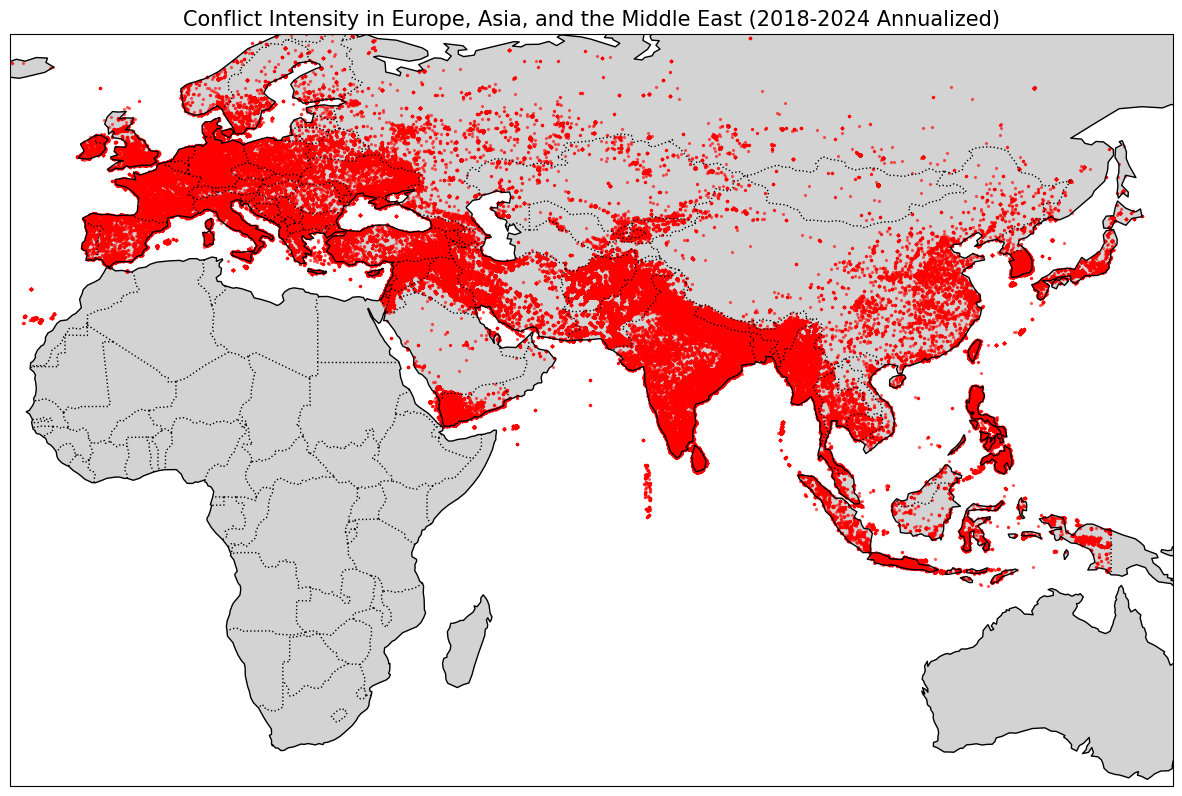

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the datasets
europe_path = '/content/drive/My Drive/Conflict_data/ACLED/europe_conflict_data.csv'
asia_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
middle_east_path = '/content/drive/My Drive/Conflict_data/ACLED/middle_east_conflict_data.csv'

europe_df = pd.read_csv(europe_path)
asia_df = pd.read_csv(asia_path)
middle_east_df = pd.read_csv(middle_east_path)

# Combine the datasets
combined_df = pd.concat([europe_df, asia_df, middle_east_df], ignore_index=True)

# Extract relevant data
events_df = combined_df[['latitude', 'longitude', 'event_type']].dropna()

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with conflict data
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-20, 150, -40, 70], crs=ccrs.PlateCarree())  # Exclude Americas

# Plot the world map with Cartopy features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Plot the events
events_gdf = gpd.GeoDataFrame(events_df, geometry=[Point(xy) for xy in zip(events_df['longitude'], events_df['latitude'])])
world.plot(ax=ax, color='lightgrey')
events_gdf.plot(ax=ax, markersize=2, color='red', alpha=0.5)

# Set titles and labels
plt.title('Conflict Intensity in Europe, Asia, and the Middle East (2018-2024 Annualized)', fontsize=15)

# Display the plot
plt.show()

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 68.9 MB/s eta 0:00:00


<ipython-input-6-d8484e5f57c8>:14: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  asia_df = pd.read_csv(asia_path)


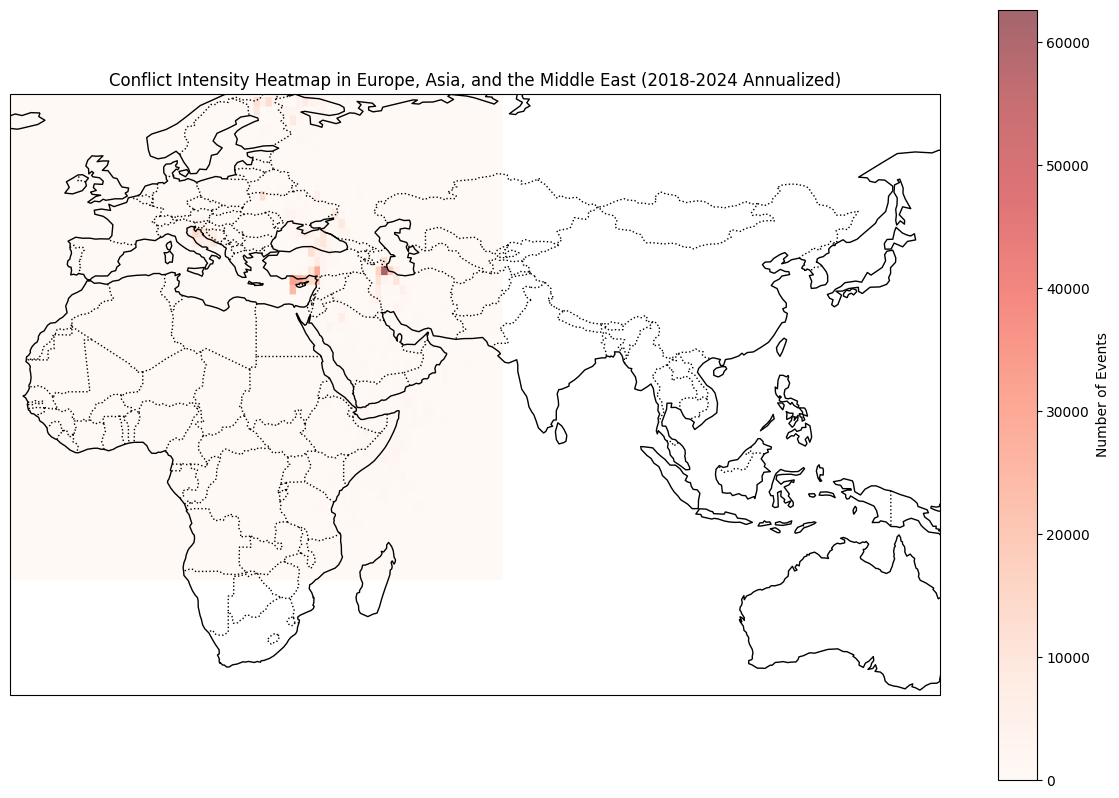

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Load the datasets
europe_path = '/content/drive/My Drive/Conflict_data/ACLED/europe_conflict_data.csv'
asia_path = '/content/drive/My Drive/Conflict_data/ACLED/asia_conflict_data.csv'
middle_east_path = '/content/drive/My Drive/Conflict_data/ACLED/middle_east_conflict_data.csv'

europe_df = pd.read_csv(europe_path)
asia_df = pd.read_csv(asia_path)
middle_east_df = pd.read_csv(middle_east_path)

# Combine the datasets
combined_df = pd.concat([europe_df, asia_df, middle_east_df], ignore_index=True)

# Extract relevant data
events_df = combined_df[['latitude', 'longitude', 'event_type']].dropna()

# Generate a grid for the heatmap
lat_bins = np.linspace(-40, 70, 100)
lon_bins = np.linspace(-20, 150, 100)

heatmap, xedges, yedges = np.histogram2d(events_df['latitude'], events_df['longitude'], bins=[lat_bins, lon_bins])

# Plot the world map with Cartopy
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-20, 150, -40, 70], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Plot the heatmap
im = ax.imshow(heatmap.T, origin='lower', cmap='Reds', alpha=0.6,
               extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

# Add color bar
cbar = plt.colorbar(im, ax=ax, orientation='vertical')
cbar.set_label('Number of Events')

plt.title('Conflict Intensity Heatmap in Europe, Asia, and the Middle East (2018-2024 Annualized)')
plt.show()

### Creating combined word cloud

---

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


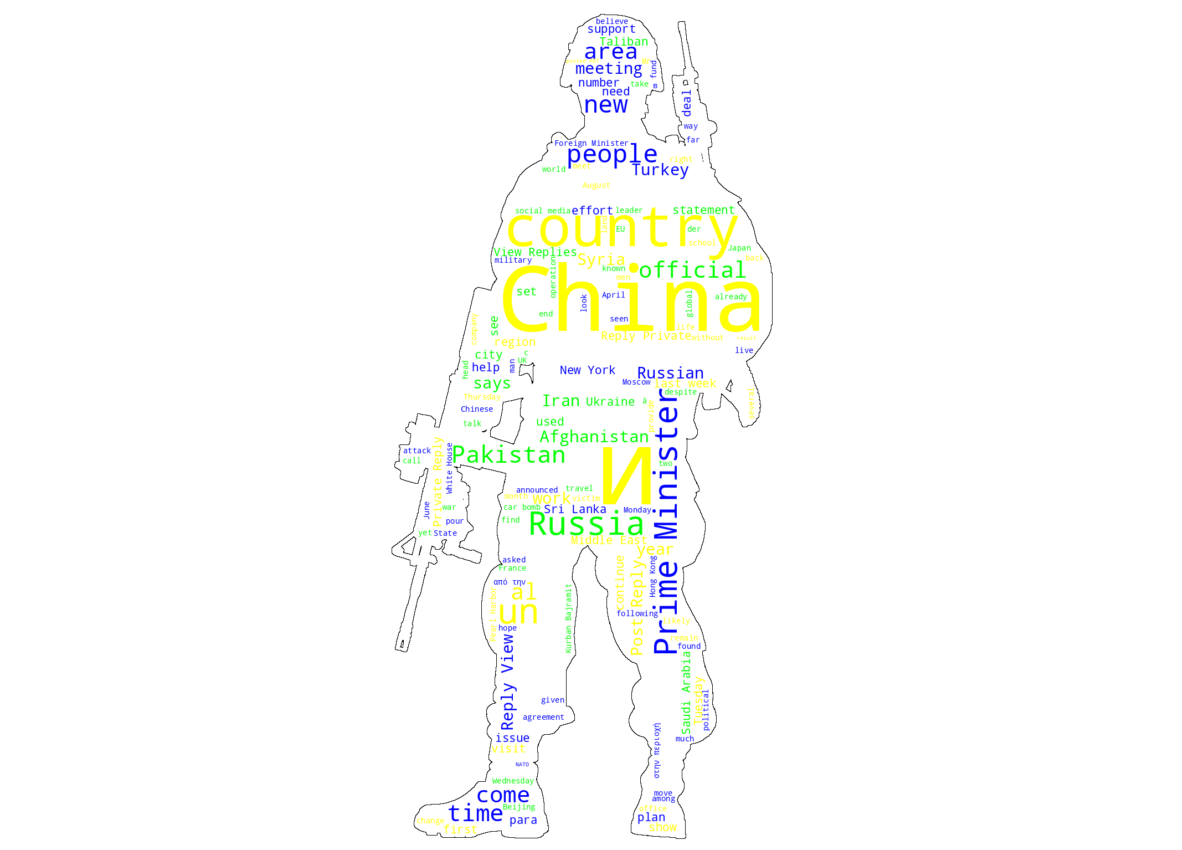

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and punkt from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Define the file paths
file_paths = [
    '/content/drive/My Drive/Conflict_data/GDELT/europe_scraped_articles_clean.csv',
    '/content/drive/My Drive/Conflict_data/GDELT/asia_scraped_articles_clean.csv',
    '/content/drive/My Drive/Conflict_data/GDELT/middle_east_scraped_articles_clean.csv'
]
mask_path = '/content/drive/My Drive/Conflict_data/Word_Cloud_Images/PNG_Files/soldier v6.png'

# Define a custom color function
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#FFFF00", "#0000FF", "#FFFFFF", "#00FF00" ]  # Yellow, Blue, White, Green
    return np.random.choice(colors)

# Load the image file for mask
mask = np.array(Image.open(mask_path))

# Common stopwords and unwanted terms
stop_words = set(stopwords.words('english'))
unwanted_terms = {'fha', 'said', 'en el', 'de', 'b', 'B', 'rights', 'reserved', 'wind', 'power', 'wind power', 'rights reserved', 'la', 'en', 'del', 'Horse', 'Fair', 'Horse Fair', 'Craig', 'Richard',
                  'Team', 'JAJO', 'JAJ0,' 'e Kurban', 'de la', 'Team JAJO', 'Ocean', 'Race', 'que', 'say', 'may', 'many', 'photo', 'Sailing', 'Renewable Energy', 'Ocean Race',
                  'u', 'sparkling', 'wine', 'sparkling wine', 'Craig Richard', 'Racing', 'Team', 'Racing  Team', 'https', 'including', 'des', 'las', 'na', 'con', 'Email', 'se',
                  'le', 'son', 'una', 'por', 'su', 'und', 'even', 'still', 'como', 'come' 'told', 'going', 'added', 'et', 'lo', 'part', 'saying', 'les', 'los', 'said', 'de', 'U',
                  'u', 'rights reserved', "Post", 'Reply','View', 'Replies', 'Private', 'well', 'del', 'may', 'Reply', 'Private', 'View Replies',
                  'Reply Private', 'Reply View', 'Private Reply', 'posted PDT', 'View  Replies', 'Reply  Private', 'Reply  View', 'Private  Reply',
                  'posted PM', 'И', "Post Reply", "Post  Reply", 'fha home', 'fha washington', 'home loans', 'virginia fha', 'florida fha', 'wisconsin fha',
                  'de la', 'west virginia', 'home', 'loans','said', 'de', 'wisconsin home', 'washington home', 'virginia', 'west', 'florida', 'washington',
                  'u', 'U', 'la', 'wisconsin', 'wyoming'}

# Combine all content into a single string
combined_content = ""

for file_path in file_paths:
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Extract the 'Content' column
    content = " ".join(data['Content'].dropna().astype(str).tolist())

    # Tokenize the text
    tokens = word_tokenize(content)

    # Remove stop words, punctuation, and unwanted terms
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha() and word.lower() not in unwanted_terms]

    # Join the tokens back into a single string
    filtered_content = " ".join(filtered_tokens)
    combined_content += filtered_content + " "

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask,
                      contour_width=1, contour_color='black', color_func=custom_color_func).generate(combined_content)

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


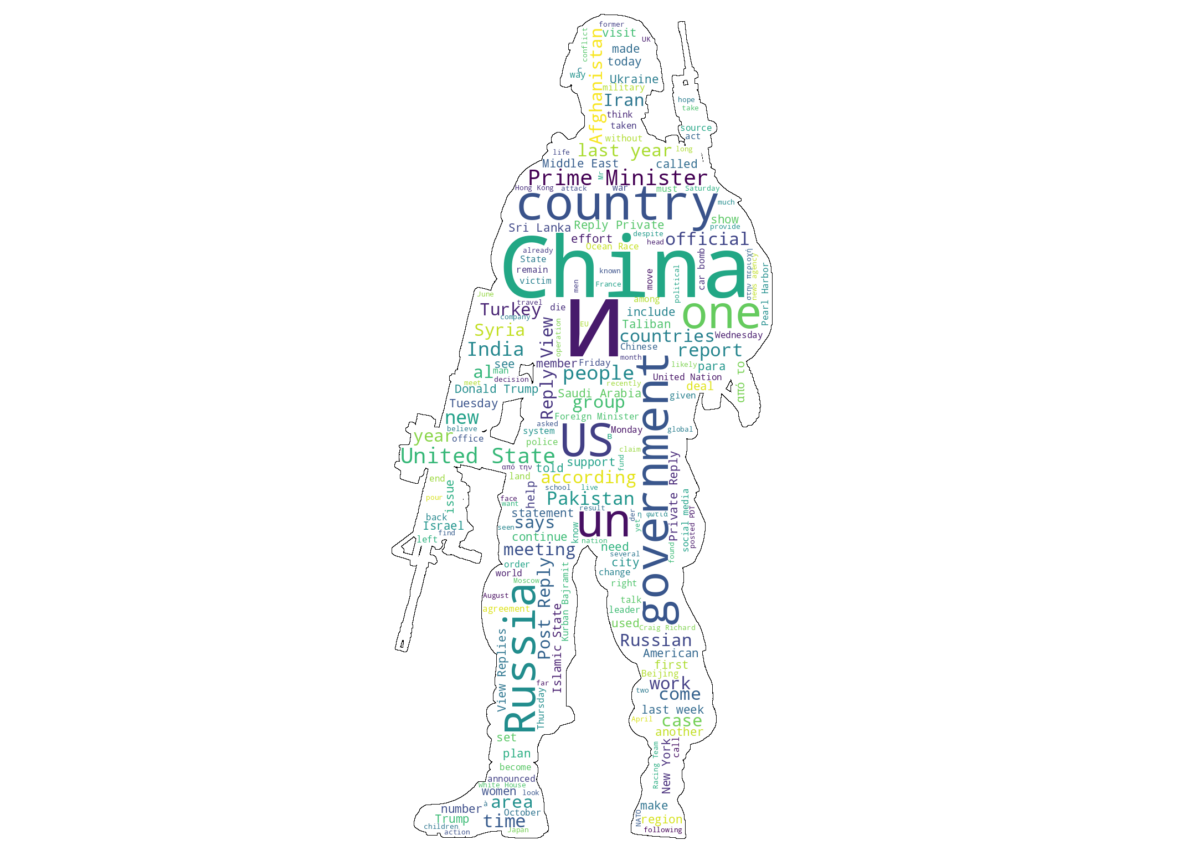

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and punkt from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Define the file paths
file_paths = [
    '/content/drive/My Drive/Conflict_data/GDELT/europe_scraped_articles_clean.csv',
    '/content/drive/My Drive/Conflict_data/GDELT/asia_scraped_articles_clean.csv',
    '/content/drive/My Drive/Conflict_data/GDELT/middle_east_scraped_articles_clean.csv'
]
mask_path = '/content/drive/My Drive/Conflict_data/Word_Cloud_Images/PNG_Files/soldier v6.png'

# Load the image file for mask
mask = np.array(Image.open(mask_path))

# Common stopwords and unwanted terms
stop_words = set(stopwords.words('english'))
unwanted_terms = {'fha', "View Replies", 'said', 'en el', 'de', 'b', 'B', 'rights', 'reserved', 'wind', 'power', 'wind power', 'rights reserved', 'la', 'en', 'del', 'Horse', 'Fair', 'Horse Fair', 'Craig', 'Richard',
                  'Team', 'JAJO', 'JAJ0,' 'e Kurban', 'de la', 'Team JAJO', 'Ocean', 'Race', 'que', 'say', 'may', 'many', 'photo', 'Sailing', 'Renewable Energy', 'Ocean Race',
                  'u', 'sparkling', 'wine', 'sparkling wine', 'Craig Richard', 'Racing', 'Team', 'Racing  Team', 'https', 'including', 'des', 'las', 'na', 'con', 'Email', 'se',
                  'le', 'son', 'una', 'por', 'su', 'und', 'even', 'still', 'como', 'come' 'told', 'going', 'added', 'et', 'lo', 'part', 'saying', 'les', 'los', 'said', 'de', 'U',
                  'u', 'rights reserved', "Post", 'Reply','View', 'Replies', 'Private', 'well', 'del', 'may', 'Reply', 'Private', 'View Replies',
                  'Reply Private', 'Reply View', 'Private Reply', 'posted PDT', 'View  Replies', 'Reply  Private', 'Reply  View', 'Private  Reply',
                  'posted PM', "И", 'И', "Post Reply", "Post  Reply", 'fha home', 'fha washington', 'home loans', 'virginia fha', 'florida fha', 'wisconsin fha',
                  'de la', 'west virginia', 'home', 'loans','said', 'de', 'wisconsin home', 'washington home', 'virginia', 'west', 'florida', 'washington',
                  'u', 'U', 'la', 'wisconsin', 'wyoming'}

# Combine all content into a single string
combined_content = ""

for file_path in file_paths:
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Extract the 'Content' column
    content = " ".join(data['Content'].dropna().astype(str).tolist())

    # Tokenize the text
    tokens = word_tokenize(content)

    # Remove stop words, punctuation, and unwanted terms
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha() and word.lower() not in unwanted_terms]

    # Join the tokens back into a single string
    filtered_content = " ".join(filtered_tokens)
    combined_content += filtered_content + " "

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask,
                      contour_width=1, contour_color='black').generate(combined_content)

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Latest Design

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


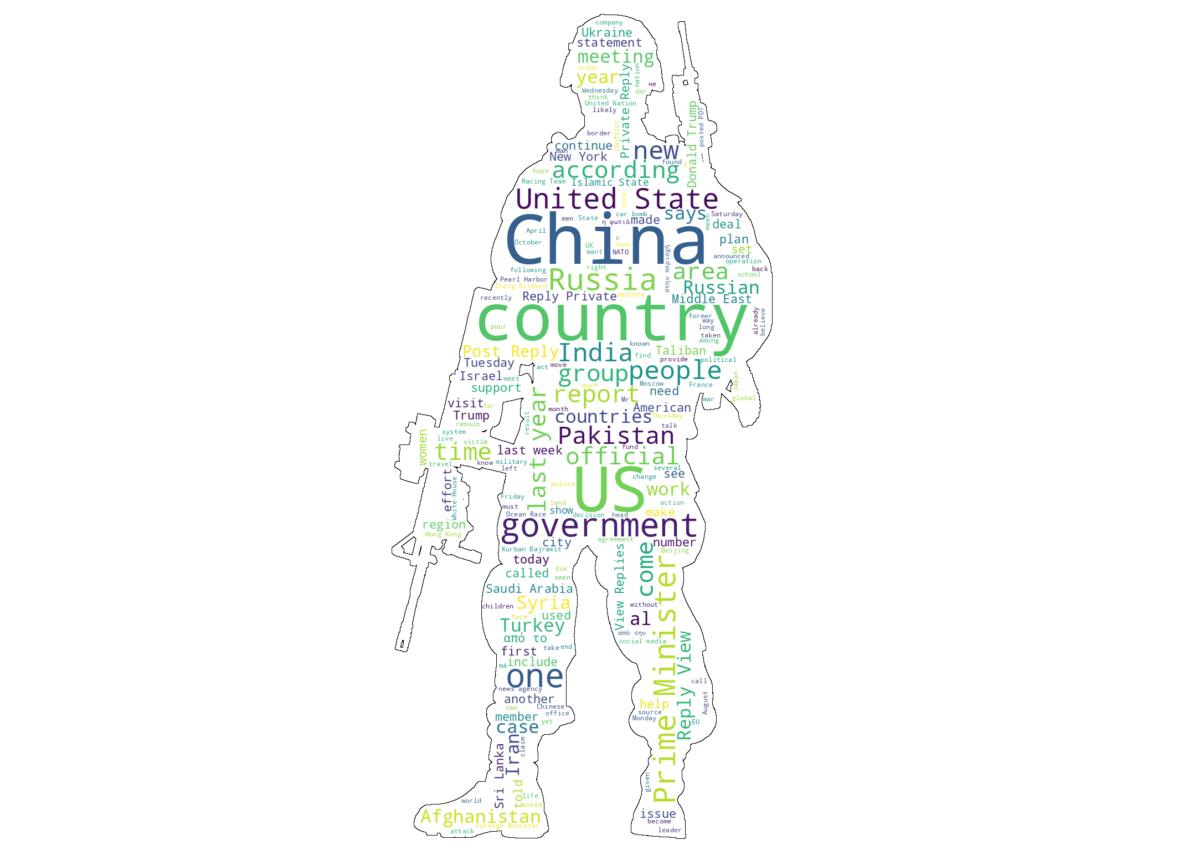

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords and punkt from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Define the file paths
file_paths = [
    '/content/drive/My Drive/Conflict_data/GDELT/europe_scraped_articles_clean.csv',
    '/content/drive/My Drive/Conflict_data/GDELT/asia_scraped_articles_clean.csv',
    '/content/drive/My Drive/Conflict_data/GDELT/middle_east_scraped_articles_clean.csv'
]
mask_path = '/content/drive/My Drive/Conflict_data/Word_Cloud_Images/PNG_Files/soldier v6.png'

# Load the image file for mask
mask = np.array(Image.open(mask_path))

# Common stopwords and unwanted terms
stop_words = set(stopwords.words('english'))
unwanted_terms = {'fha','fha home', 'fha washington', 'home loans', 'virginia fha', 'florida fha', 'wisconsin fha', 'de la', 'west virginia', 'home', 'loans',
                  'said', 'de', 'wisconsin home', 'washington home', 'virginia', 'west', 'florida', 'washington', 'u', 'U', 'la', 'wisconsin', 'wyoming', 'в',
                  'и','И', 'u', 'n', 'un','fha', 'said', 'en el', 'de', "b", "B", 'rights', 'reserved', 'wind', 'power', 'wind power', 'rights reserved', 'la',
                  'en', 'del', 'Horse','Fair', 'Horse Fair', 'Craig', 'Richard','Team', 'JAJO', 'JAJ0,' 'e Kurban', 'de la', 'Team JAJO', 'Ocean', 'Race', 'que',
                  'say', 'may', 'many', 'photo', 'Sailing','Renewable Energy', 'Ocean Race','u', 'sparkling', 'wine', 'sparkling wine', 'Craig Richard', 'Racing',
                  'Team', 'Racing  Team', 'https', 'including', 'des', 'las','na', 'con', 'Email', 'se','le', 'son', 'una', 'por', 'su', 'und', 'even', 'still',
                  'como', 'come' 'told', 'going', 'added', 'et', 'lo', 'part', 'saying', 'les', 'los', 'el', 'la', 'para', 'said', 'de', 'U', 'u', 'rights reserved',
                  "Post", 'Reply', 'View', 'Replies', 'Private', 'well', 'del', 'may', 'Reply', 'Private', 'View Replies','Reply Private', 'Reply View', 'Private Reply',
                  'posted PDT', 'View Replies', 'Reply Private', 'Reply View', 'Private Reply', 'posted PM', "Post Reply", "Post Reply"}

# Combine all content into a single string
combined_content = ""

for file_path in file_paths:
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Extract the 'Content' column
    content = " ".join(data['Content'].dropna().astype(str).tolist())

    # Tokenize the text
    tokens = word_tokenize(content)

    # Remove stop words, punctuation, and unwanted terms
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.isalpha() and word.lower() not in unwanted_terms]

    # Join the tokens back into a single string
    filtered_content = " ".join(filtered_tokens)
    combined_content += filtered_content + " "

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', mask=mask,
                      contour_width=1, contour_color='black').generate(combined_content)

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-8-33dc622f2d99>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='viridis')
<ipython-input-8-33dc622f2d99>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='viridis')
<ipython-input-8-33dc622f2d99>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

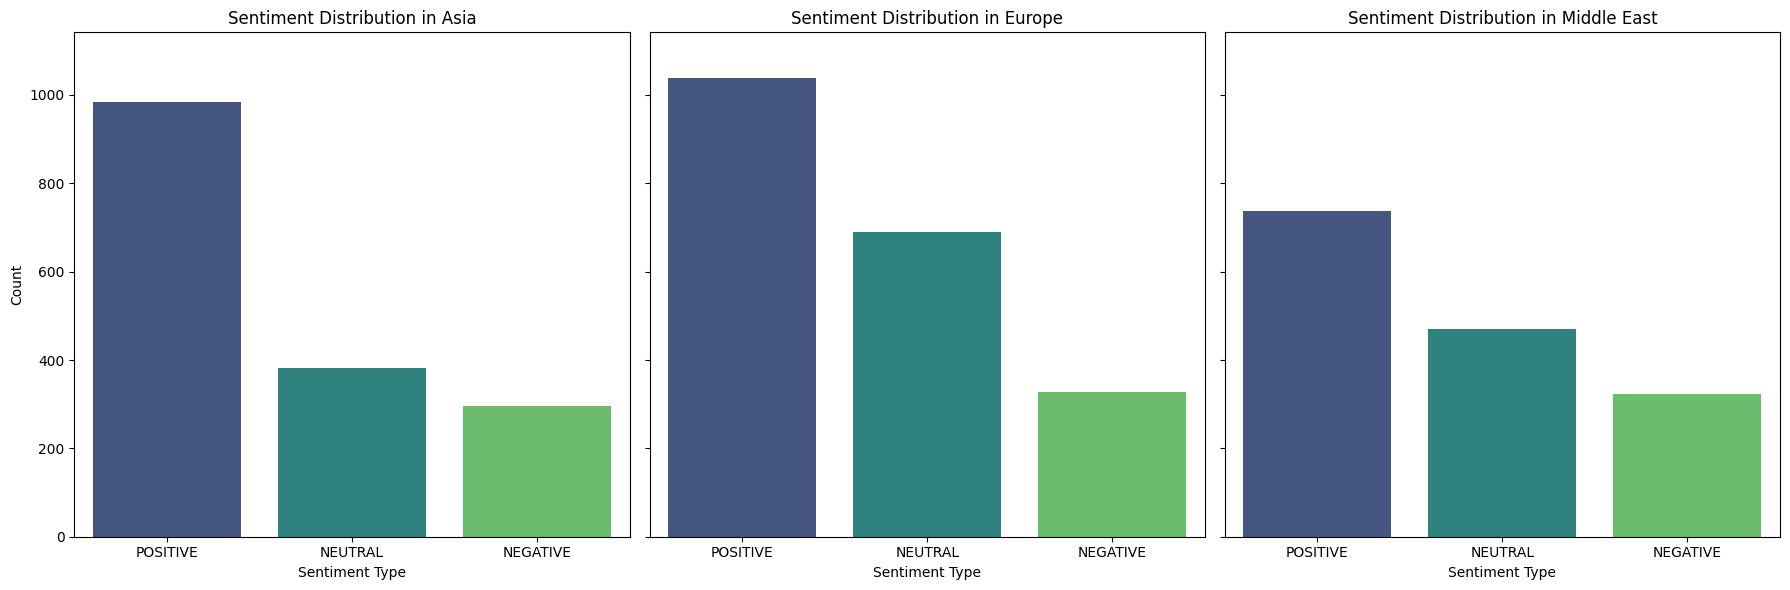

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Unwanted terms
unwanted_terms = {'fha', "View Replies", 'said', 'en el', 'de', 'b', 'B', 'rights', 'reserved', 'wind', 'power', 'wind power', 'rights reserved', 'la', 'en', 'del', 'Horse', 'Fair', 'Horse Fair', 'Craig', 'Richard',
                  'Team', 'JAJO', 'JAJ0,' 'e Kurban', 'de la', 'Team JAJO', 'Ocean', 'Race', 'que', 'say', 'may', 'many', 'photo', 'Sailing', 'Renewable Energy', 'Ocean Race',
                  'u', 'sparkling', 'wine', 'sparkling wine', 'Craig Richard', 'Racing', 'Team', 'Racing  Team', 'https', 'including', 'des', 'las', 'na', 'con', 'Email', 'se',
                  'le', 'son', 'una', 'por', 'su', 'und', 'even', 'still', 'como', 'come' 'told', 'going', 'added', 'et', 'lo', 'part', 'saying', 'les', 'los', 'said', 'de', 'U',
                  'u', 'rights reserved', "Post", 'Reply','View', 'Replies', 'Private', 'well', 'del', 'may', 'Reply', 'Private', 'View Replies',
                  'Reply Private', 'Reply View', 'Private Reply', 'posted PDT', 'View  Replies', 'Reply  Private', 'Reply  View', 'Private  Reply',
                  'posted PM', "И", 'И', "Post Reply", "Post  Reply", 'fha home', 'fha washington', 'home loans', 'virginia fha', 'florida fha', 'wisconsin fha',
                  'de la', 'west virginia', 'home', 'loans','said', 'de', 'wisconsin home', 'washington home', 'virginia', 'west', 'florida', 'washington',
                  'u', 'U', 'la', 'wisconsin', 'wyoming'}

# Function to preprocess the text and remove unwanted terms
def preprocess_text(text):
    # Removing punctuation and lowercasing
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenization and lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.isalpha() and word not in stopwords.words('english') and word not in unwanted_terms]
    return tokens

# Function to join tokens back into a string for sentiment analysis
def join_tokens(tokens):
    return ' '.join(tokens)

# Define a function for TextBlob sentiment analysis
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Define a function for VADER sentiment analysis
def vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    return vs['compound']

# Process data for each region and store the sentiment counts
regions = {
    'Asia': '/content/drive/My Drive/Conflict_data/GDELT/asia_scraped_articles_clean.csv',
    'Europe': '/content/drive/My Drive/Conflict_data/GDELT/europe_scraped_articles_clean.csv',
    'Middle East': '/content/drive/My Drive/Conflict_data/GDELT/middle_east_scraped_articles_clean.csv'
}

sentiment_counts = {}

for region, file_path in regions.items():
    # Reading the CSV file
    df = pd.read_csv(file_path)

    # Apply preprocessing
    processed_docs = df['Content'].map(preprocess_text)
    df['processed_content'] = processed_docs.map(join_tokens)

    # Apply TextBlob sentiment analysis
    df['textblob_polarity'] = df['processed_content'].apply(textblob_sentiment)

    # Assign sentiment type based on TextBlob polarity
    df['textblob_sentiment_type'] = ''
    df.loc[df.textblob_polarity > 0, 'textblob_sentiment_type'] = 'POSITIVE'
    df.loc[df.textblob_polarity == 0, 'textblob_sentiment_type'] = 'NEUTRAL'
    df.loc[df.textblob_polarity < 0, 'textblob_sentiment_type'] = 'NEGATIVE'

    # Count the sentiment types
    sentiment_counts[region] = df['textblob_sentiment_type'].value_counts()

# Plotting the sentiment distribution for each region
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, (region, counts) in zip(axes, sentiment_counts.items()):
    sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='viridis')
    ax.set_title(f'Sentiment Distribution in {region}')
    ax.set_xlabel('Sentiment Type')
    ax.set_ylabel('Count')
    ax.set_ylim(0, max([max(counts) for counts in sentiment_counts.values()]) * 1.1)

plt.tight_layout()
plt.show()

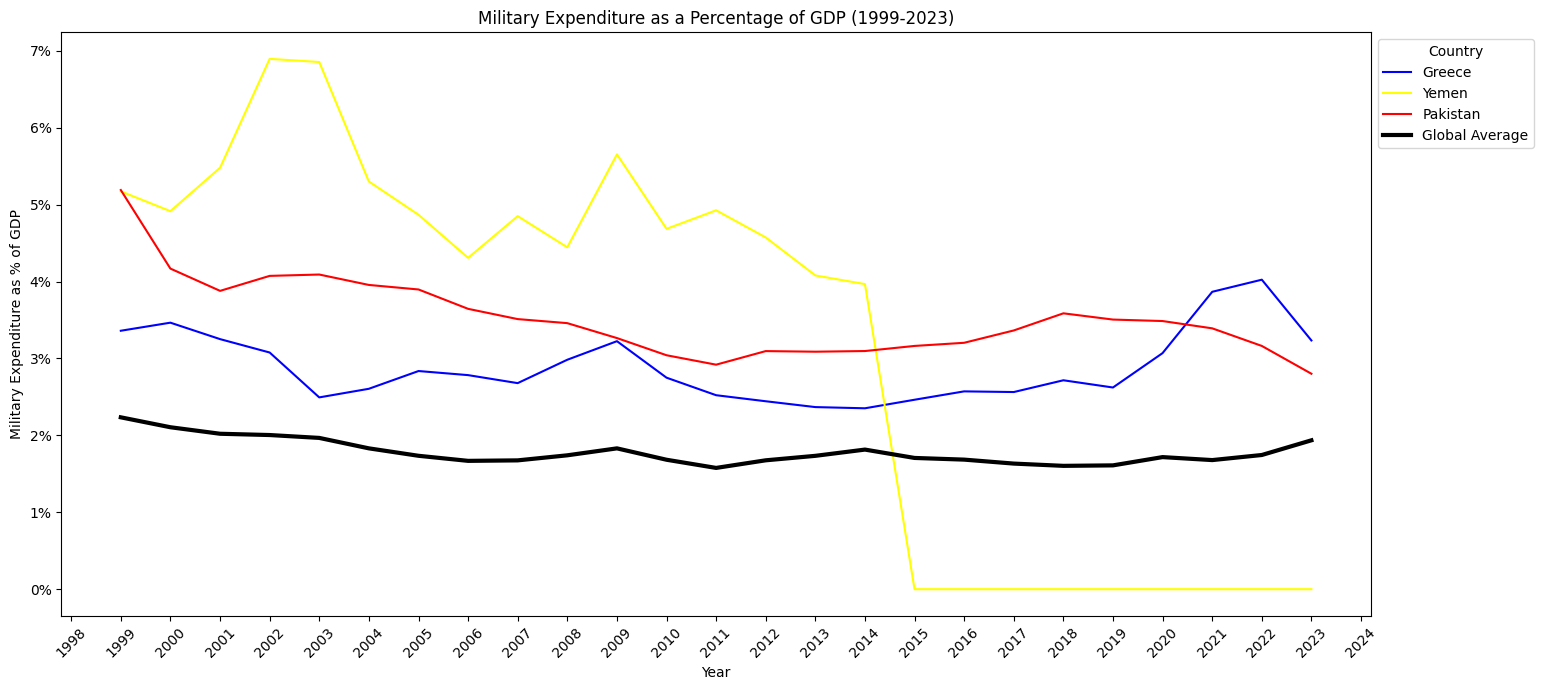

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the military expenditure as a percentage of GDP data for each region
file_path = '/content/drive/My Drive/Conflict_data/SIPRI/SIPRI-Milex-data-1948-2023_modified.xlsx'
middle_east_df = pd.read_excel(file_path, sheet_name='Middle East Share of GDP')
europe_df = pd.read_excel(file_path, sheet_name='Europe Share of GDP')
asia_df = pd.read_excel(file_path, sheet_name='Asia Share of GDP')

# Ensure the 'Year' column is treated as datetime
middle_east_df['Year'] = pd.to_datetime(middle_east_df['Year'], format='%Y')
europe_df['Year'] = pd.to_datetime(europe_df['Year'], format='%Y')
asia_df['Year'] = pd.to_datetime(asia_df['Year'], format='%Y')

# Strip any extra whitespace from column names
middle_east_df.columns = middle_east_df.columns.str.strip()
europe_df.columns = europe_df.columns.str.strip()
asia_df.columns = asia_df.columns.str.strip()

# Extract the 'Global Average' series
global_average = middle_east_df[['Year', 'Global Average']].rename(columns={'Global Average': 'Global Average % of GDP'})

# Extract the specific country data
yemen_data = middle_east_df[['Year', 'Yemen']].rename(columns={'Yemen': 'Yemen % of GDP'})
greece_data = europe_df[['Year', 'Greece']].rename(columns={'Greece': 'Greece % of GDP'})
pakistan_data = asia_df[['Year', 'Pakistan']].rename(columns={'Pakistan': 'Pakistan % of GDP'})

# Merge all data into a single DataFrame
merged_data = pd.merge(global_average, yemen_data, on='Year')
merged_data = pd.merge(merged_data, greece_data, on='Year')
merged_data = pd.merge(merged_data, pakistan_data, on='Year')

# Melt the dataframe to long format for seaborn
melted_data = merged_data.melt(id_vars=['Year'], var_name='Country', value_name='Expenditure as % of GDP')

# Plot the data
plt.figure(figsize=(14, 7))

# Plot the specific countries with custom colors
sns.lineplot(data=melted_data[melted_data['Country'] == 'Greece % of GDP'], x='Year', y='Expenditure as % of GDP', color='blue', label='Greece')
sns.lineplot(data=melted_data[melted_data['Country'] == 'Yemen % of GDP'], x='Year', y='Expenditure as % of GDP', color='yellow', label='Yemen')
sns.lineplot(data=melted_data[melted_data['Country'] == 'Pakistan % of GDP'], x='Year', y='Expenditure as % of GDP', color='red', label='Pakistan')

# Plot the Global Average as a thick, bold black line
sns.lineplot(data=melted_data[melted_data['Country'] == 'Global Average % of GDP'], x='Year', y='Expenditure as % of GDP', color='black', linewidth=3, label='Global Average')

# Set title and labels
plt.title('Military Expenditure as a Percentage of GDP (1999-2023)')
plt.xlabel('Year')
plt.ylabel('Military Expenditure as % of GDP')

# Set x-axis to display all years
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set y-axis to display as percentage with appropriate range
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=0))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()